In [1]:
from bayesprob import *

#A function to produce the first two figures
def fig2a(a_0,lamda_0,a_r,kappa,delta_0,delta_1):
    fig,ax=plt.subplots()
    pie=twodm(np.linspace(.001,.999,1000))
    #Intitialise and compute the surprise and the delta based on that initial surprise
    pie_0=lamda_0*a_0+(1-lamda_0)*a_r
    sup=pie-pie_0
    h_kappa=4*(1+kappa)/(1-kappa)   
    delta_=logit(delta_0,delta_1,sup,h_kappa)

    #Recompute the expected ex-ante surprise and revise delta (this is iterated within the main code)
    pie_bar_0=pie_bar(pie_0=pie_0,delta_=delta_,kappa=kappa)
    sup=pie-pie_bar_0
    delta_=logit(delta_0,delta_1,sup,h_kappa)

    #Produce inflated, deflated values and then the expected value attributed to the source allowing for dishonest 
    pie_i,pie_d,pie_s=pie_actual(pie,delta_=delta_,kappa=kappa)
    mu0=pie_0*ones(rows(pie))

    #These are the actual probabilities and their expectation given the stated
    pieframe=frame(cc([pie_i,pie_d,mu0,pie,pie_s]))
    pieframe.columns=[r'$π^i_{s}$',r'$π^d_{s}$',r'$π_{0}$',r'$\bar{π}_{s}$',r'$π^{s}$']
    pieframe.index=np.linspace(.01,.99,1000)
    title='Inflation by the Source: '+r'$δ_0$'+ '=' +str(delta_0) +', '+r'$δ_1$'+ '=' +str(delta_1) +', '+r'$κ$'+'=0.1' 
    pieframe.plot(grid=True,xlabel=r'$\bar{π}_{s}$',ax=ax, title=title,lw=3)
    ax.legend(fontsize=16)
    
#A function to produce the second two figures    
def fig2b(a_0,lamda_0,a_r,kappa,lst):
    fig,ax=plt.subplots()
    pie=twodm(np.linspace(.001,.999,1000))
    pie_0=lamda_0*a_0+(1-lamda_0)*a_r
    P,D1,D2=[],[],[]
    j=0
    for d in lst:
        D1+=[d[0]]
        D2+=[d[1]]
        p0,sup1,delta0=disc(pie,delta=d,pie_0=pie_0,kappa=kappa,iters=100)
        if j==0:
           P=p0
        else:
           P=cc([P,p0])
        j=j+1
    out=frame(P)
    out.index=np.linspace(.001,.999,1000)
    c=[]
    for d in zip(D1,D2):
        c+=[r'$π^{s}$'+', '+r'$δ_0$'+ '=' +str(d[0]) +', ' +r'$δ_1$'+ '=' + str(d[1])]
    out.columns=c
    title='Posterior Means Attributed to the Source: '+r'$κ$'+'='+str(kappa)
    out.plot(grid=True,xlabel=r'$\bar{π}_{s}$', title=title,lw=3,ax=ax)
    ax.legend(fontsize=16)

# Figure 2.1

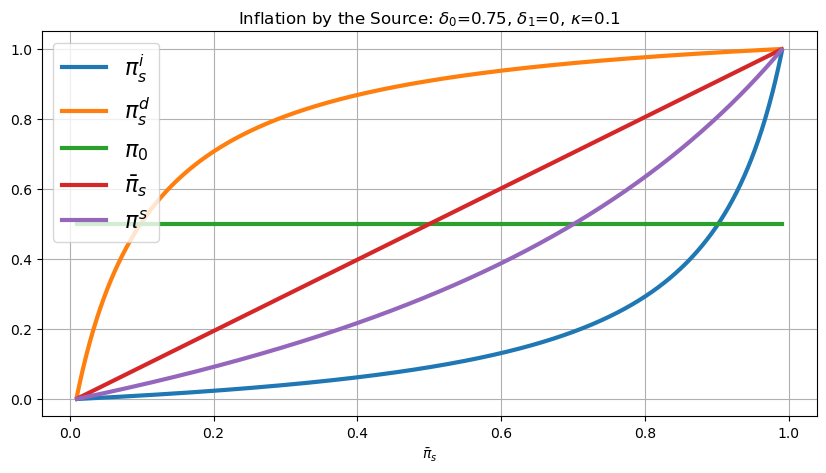

In [2]:
pltsize(5,10)
fg2a=fig2a(a_0=0.5,lamda_0=0.5,a_r=0.5,kappa=0.1,delta_0=.75,delta_1=0)
#plt.savefig(direcout+'Fig2.1'+'.png',bbox_inches='tight')

# Figure 2.2

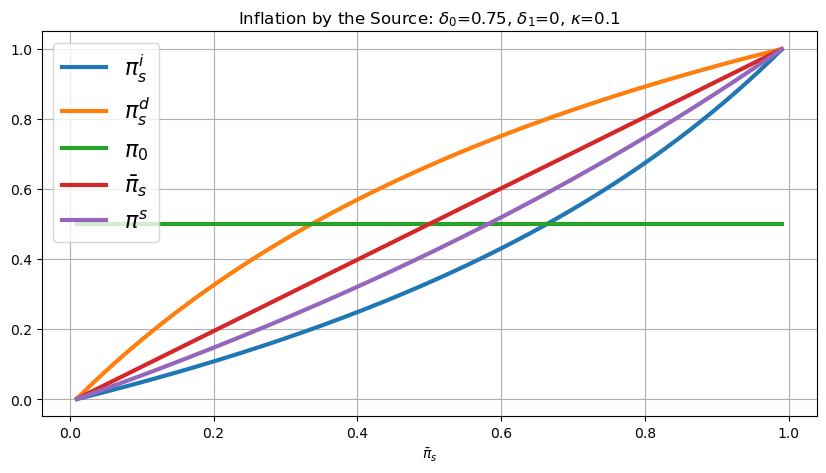

In [3]:
pltsize(5,10)
fg2b=fig2a(a_0=0.5,lamda_0=0.5,a_r=0.5,kappa=0.5,delta_0=0.75,delta_1=0)
#plt.savefig(direcout+'Fig2.2'+'.png',bbox_inches='tight')

# Figure 2.3

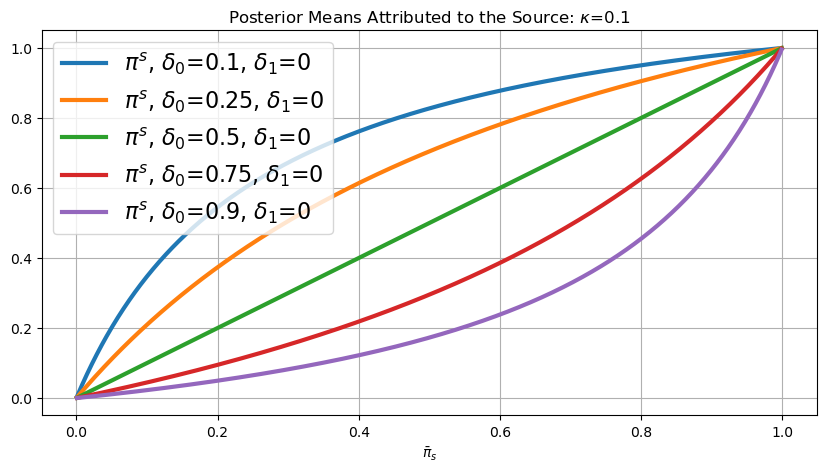

In [4]:
#The list contains a series of delta0 and delta1s
pltsize(5,10)
delta_1=0
lst=[[.1,delta_1],[.25,delta_1],[.5,delta_1],[.75,delta_1],[.9,delta_1]]
fg2c=fig2b(a_0=0.5,lamda_0=0.5,a_r=0.5,kappa=0.1,lst=lst)
#plt.savefig(direcout+'Fig2.3'+'.png',bbox_inches='tight')

# Figure 2.4

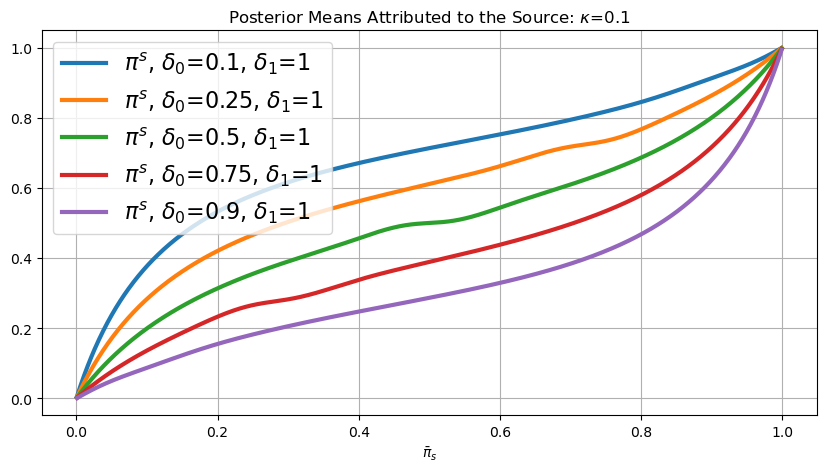

In [5]:
#The list contains a series of delta0 and delta1s
pltsize(5,10)
delta_1=1
lst=[[.1,delta_1],[.25,delta_1],[.5,delta_1],[.75,delta_1],[.9,delta_1]]
fig2d=fig2b(a_0=0.5,lamda_0=0.5,a_r=0.5,kappa=0.1,lst=lst)
#plt.savefig(direcout+'Fig2.4'+'.png',bbox_inches='tight')

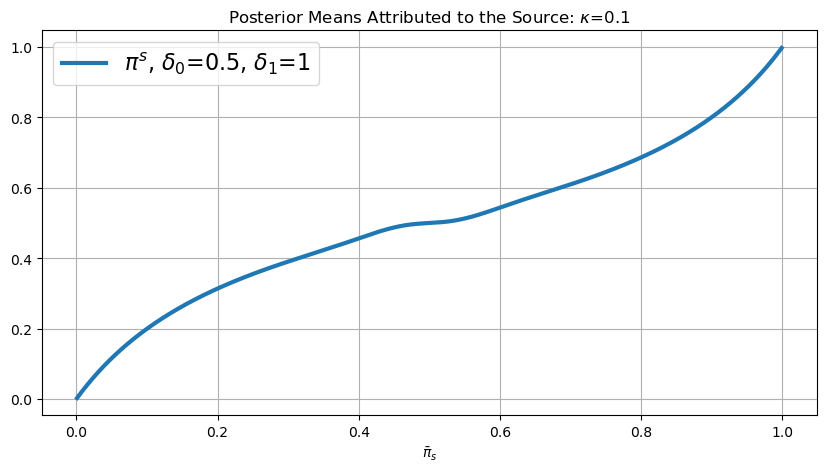

In [6]:
#You can explore others here out of interest
pltsize(5,10)
lst=[[.5,1]]
fig2b(a_0=0.5,lamda_0=0.5,a_r=0.5,kappa=0.1,lst=lst)

In [7]:
#Note that by simply treating pie_0 as a parameter we have a three parameter curve which has a range of general shapes
#This function could be used instead of prelec II for prospect theory, though there identification issues
#pie_0 only matters if delta_1 is not zero


def detect(pie_0,delta_0,delta_1):
    pie=twodm(np.linspace(.001,.999,1000))
    delta_=logit(delta_0,delta_1,pie-pie_0)
    pie_bar_0=pie_bar(pie_0=pie_0,delta_=delta_,kappa=.1)
    pie_i, pie_d,pie_s=pie_actual(pie,delta_=delta_,kappa=.1)
    pie_s=frame(pie_s)
    #pie_s.plot()
    return float((pie_s.diff()<0).sum().iloc[0])

detect(1/2,1/2,1)

C:\Users\aes05kgb\AppData\Local\Temp\ipykernel_10804\2077996843.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float((pie_s.diff()<0).sum())


0.0

In [60]:
kappa=0.1
for pie_0 in np.linspace(.001,.999,100):
    for delta_0 in np.linspace(.001,.999,100):
        pie_0,delta_0,delta_1=pie_0,delta_0,1*(1+kappa)/(1-kappa)
        f=detect(pie_0,delta_0,delta_1)
        if f>0:
           print(pie_0,delta_0,f)